In [1]:
import os
import matplotlib.pyplot as plt
os.environ['IS_NOTEBOOK'] = 'true'

import matplotlib
from matplotlib import rc

plt.style.use('default')

# activate latex text rendering
rc('font',**{'family':'serif','serif':['Computer Modern Roman'], 'size':12})
rc('text', usetex=True)

matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xspec

xspec.AllData.clear()
xspec.AllModels.clear()

xspec.Xset.restore("model.xcm")

xspec.Fit.statMethod = "cstat"
xspec.Fit.bayes = "on"
xspec.Fit.query = "no"
xspec.Fit.criticalDelta = 1e-3
xspec.Fit.nIterations = 50
xspec.Fit.bayes = "cons"

xspec_observation = xspec.Spectrum("spectrum_opt.pha")
xspec_observation.background = None
low_energy, high_energy = 0.3, 12.
xspec_observation.ignore(f"0.0-{low_energy:.1f} {high_energy:.1f}-**")

xspec_model = xspec.AllModels(1)
xspec_model.show()

 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
Parameter delta values for fits will now be 0.01 * parValue

 The default systematic error for models is set to 0

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Model TBabs<1>(compTT<2> + powerlaw<3>) Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp


In [3]:
from bsixsa import SIXSASolver
from bsixsa.convenience import set_prior_and_build_transform

define_prior = [
    ("TBabs", "nH", 0.01, 0.2, "uniform"),       # 10^22    0.100000     +/-  0.0
    ("compTT", "T0", 0.05, 2.0, "uniform"),      #   keV      0.550000     +/-  0.0
    ("compTT", "kT", 2.1, 4.0, "uniform"),      #  keV      2.50000      +/-  0.0
    ("compTT", "taup", 0.5, 7, "uniform"),    #            2.50000      +/-  0.0
    ("compTT", "norm", 0.1, 10, "loguniform"),    #            1.00000      +/-  0.0
    ("powerlaw", "PhoIndex", 0.0, 5.0, "uniform"),  #          2.00000      +/-  0.0
    ("powerlaw", "norm", 0.01, 10, "loguniform")        #0.275000     +/-  0.0
]

transformations = set_prior_and_build_transform(xspec_model, define_prior)


Fit statistic  : C-Statistic                20680.85     using 2961 bins.
   (Includes a Bayesian contribution of -4.61)

Test statistic : Chi-Squared                13833.37     using 2961 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

  uniform prior for nH between 0.010000 and 0.200000 
  uniform prior for T0 between 0.050000 and 2.000000 
  uniform prior for kT between 2.100000 and 4.000000 
  uniform prior for taup between 0.500000 and 7.000000 
  jeffreys prior for norm between 1.000000e-01 and 1.000000e+01 
  uniform prior for PhoIndex between 0.000000 and 5.000000 
  jeffreys prior for norm between 1.000000e-02 and 1.000000e+01 
 Null hypothesis probability of 0.00e+00 with 2954 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                20679.65     using 2961 bins.
   (Includes a Bayesian contribution of -5.80)

Test statistic : Chi-Squared                13833.37  

In [4]:
training_kwargs = dict(
    discard_prior_samples=False,
    force_first_round_loss=True,
    retrain_from_scratch=False
)

In [5]:
solver_summary = SIXSASolver(
    transformations,
    outputfiles_basename="sixsa_result_sri_summary/"
)

posterior_summary = solver_summary.run(num_rounds=1, num_simulations=300_000, training_kwargs=training_kwargs)

Round 1 - Folding model:   0%|          | 0/300000 [00:00<?, ?it/s]

 Neural network successfully converged after 182 epochs.

Folding model:   0%|          | 0/10000 [00:00<?, ?it/s]

   All chains are now removed.
  New chain sixsa_result_sri_summary/chain.fits is now loaded.
  Default chain length is now set to length of sixsa_result_sri_summary/chain.fits: 10000

Fit statistic  : C-Statistic                2617.475     using 2961 bins.
   (Includes a Bayesian contribution of -0.355)

Test statistic : Chi-Squared                2497.736     using 2961 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 1.000e+00 with 2954 degrees of freedom
 Current data and model not fit yet.


In [6]:
solver_full = SIXSASolver(
    transformations,
    outputfiles_basename="sixsa_result_sri_full/"
)

posterior_full = solver_full.run(num_rounds=1, num_simulations=300_000, training_kwargs=training_kwargs, embedding=None)

Round 1 - Folding model:   0%|          | 0/300000 [00:00<?, ?it/s]

 Neural network successfully converged after 85 epochs.

Folding model:   0%|          | 0/10000 [00:00<?, ?it/s]

   All chains are now removed.
  New chain sixsa_result_sri_full/chain.fits is now loaded.
  Default chain length is now set to length of sixsa_result_sri_full/chain.fits: 10000

Fit statistic  : C-Statistic                2716.026     using 2961 bins.
   (Includes a Bayesian contribution of 0.716)

Test statistic : Chi-Squared                2856.807     using 2961 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 8.979e-01 with 2954 degrees of freedom
 Current data and model not fit yet.


In [7]:
from bsixsa.xspec_stuff import parallel_folding

ref_parameters = {
    1: 0.1,
    2: 0.0,
    3: 0.8,
    4: 4.,
    5: 1.5,
    6: 1.0,
    7: 0.7,
    8: 2.,
    9: 0.1
}

num_test_spectra = 75
test_xspec_pars = []
for i in range(num_test_spectra):
    pars = ref_parameters.copy()
    pars[3] = np.random.uniform(0.2, 0.8) # Change seed temperature
    test_xspec_pars.append(pars)

test_spectra = parallel_folding(test_xspec_pars)

Folding model:   0%|          | 0/75 [00:00<?, ?it/s]

In [8]:
from bsixsa.summary_stats import summary_statistics_func

energy_low_observation, energy_high_observation = np.asarray(xspec.AllData(1).energies).T
test_stats, _ = summary_statistics_func(test_spectra, energy_low_observation=energy_low_observation, energy_high_observation=energy_high_observation)

y_summary = []
y_full = []

for i in range(num_test_spectra):
    posterior_pars_list = solver_summary.unit_cube_to_xspec(posterior_summary.sample((1000,), x=test_stats[i]).numpy().T)
    y_summary.append(np.asarray([pars[3] for pars in posterior_pars_list]))

    posterior_pars_list = solver_summary.unit_cube_to_xspec(posterior_full.sample((1000,), x=test_spectra[i]).numpy().T)
    y_full.append(np.asarray([pars[3] for pars in posterior_pars_list]))

y_summary = np.asarray(y_summary)
y_full = np.asarray(y_full)

In [12]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

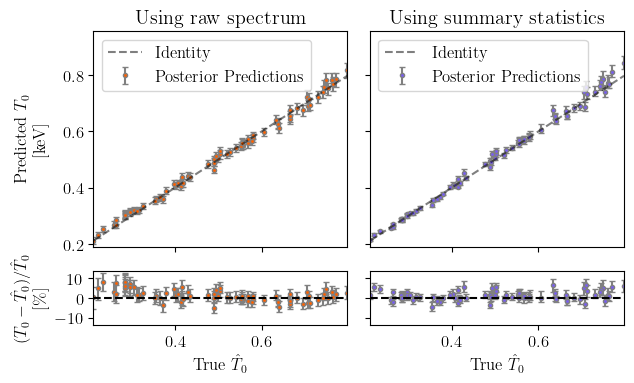

In [25]:
import numpy as np
import matplotlib.pyplot as plt

colors = ["#fe6100", "#785ef0", "#ffb000",  "#dc267f",  "#648fff"]

x = np.asarray([par[3] for par in test_xspec_pars])

fig, axs = plt.subplots(2, 2, sharex=True, sharey="row", figsize=(6.5, 4),
                               gridspec_kw={'height_ratios': [4, 1]})

for i, (y, color) in enumerate(zip([y_full, y_summary], colors)):

    ax1, ax2 = axs[:, i]
    y_pred = np.asarray(y)
    y_med = np.median(y_pred, axis=1)
    y_low = np.percentile(y_pred, 16, axis=1)
    y_high = np.percentile(y_pred, 84, axis=1)
    err_lower = y_med - y_low
    err_upper = y_high - y_med

    errorbar_settings = dict(
        fmt='o',
        ecolor='gray',
        capsize=2,
        linestyle='none',
        markerfacecolor=color,
        markeredgecolor='gray',
        markersize=3,
        #alpha=0.7
    )

    ax1.errorbar(x, y_med,
                 yerr=[err_lower, err_upper],
                 **errorbar_settings,
                 label='Posterior Predictions', zorder=0)

    ax1.plot([x.min(), x.max()], [x.min(), x.max()], 'k--', label='Identity', zorder=10, alpha=0.5)
    ax1.set_xlim(x.min(), x.max())
    ax1.set_ylim(y_low.min()*0.9, y_high.max()*1.1)

    ax1.legend()


    residuals = (y_med - x)/x * 100

    ax2.errorbar(x, residuals,
                 yerr=[err_lower/x * 100, err_upper/x * 100],
                 **errorbar_settings, zorder=0)

    # Draw a horizontal line at zero (perfect prediction).
    ax2.axhline(0, color='k', linestyle='--')

# Label the second axis.
axs[1, 0].set_xlabel(r'True $\hat{T}_0$')
axs[1, 1].set_xlabel(r'True $\hat{T}_0$')
axs[1, 0].set_ylabel(r'$(T_0 - \hat{T}_0)/\hat{T}_0$' + '\n' + r'[$\%$]', multialignment='center')

y_lim = np.max(np.abs(axs[1, 0].get_ylim()))
axs[1, 0].set_ylim(-y_lim, y_lim)
axs[0, 0].set_ylabel(r'Predicted $T_0$' + '\n' + '[keV]', multialignment='center')
axs[0, 0].set_title("Using raw spectrum")
axs[0, 1].set_title("Using summary statistics")
fig.align_ylabels()
plt.tight_layout()
fig.savefig("figures/sri_temperature.pdf", bbox_inches='tight')
plt.show()

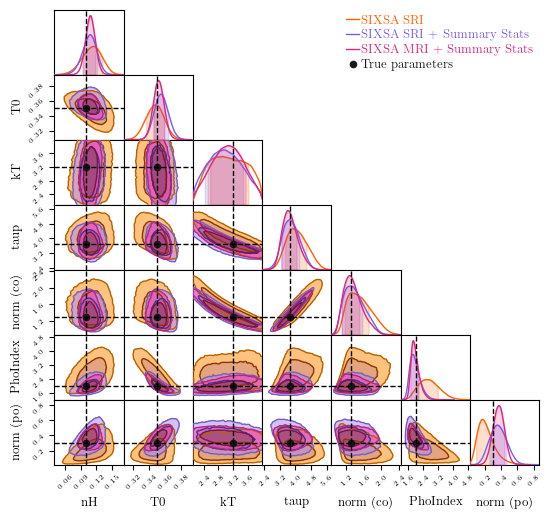

In [19]:
from chainconsumer import ChainConsumer
import pandas as pd
from generate_ref_spectrum import truth
from chainconsumer import Chain, ChainConsumer, Truth

solver = solver_summary

indexes = np.sort([t['index'] for t in solver.transformations])
parameter_names = np.asarray(solver.parameter_names_uniques)[indexes-1]

truth = [truth[t["index"]] for t in solver.transformations]
truth_loc = {name:truth[i] for i, name in enumerate(parameter_names)}

chain_full = solver_full.chain_from_sample(
    solver_full.unit_cube_to_xspec(posterior_full.sample((100_000,)).numpy().T),
    name="SIXSA SRI",
    color=colors[0]
)

chain_summary = solver_summary.chain_from_sample(
    solver_summary.unit_cube_to_xspec(posterior_summary.sample((100_000,)).numpy().T),
    name="SIXSA SRI + Summary Stats",
    color=colors[1])


chain_mri = Chain(
    samples=pd.read_csv("results_df/sixsa_mri_summary.csv").drop(columns=['Unnamed: 0']),
    name="SIXSA MRI + Summary Stats",
    color=colors[3]
)

cc = ChainConsumer()

cc.add_chain(chain_full)
cc.add_chain(chain_summary)
cc.add_chain(chain_mri)
cc.add_truth(Truth(location=truth_loc, color="black"))
cc.add_marker(location=truth_loc, name="True parameters", color="black", marker_style="o", marker_size=20)

from chainconsumer import PlotConfig

cc.set_plot_config(
    PlotConfig(
        usetex=True,
        label_font_size=9,
        tick_font_size=5,
        serif=True,
    )
)

fig = cc.plotter.plot(figsize=(6, 6))
fig.align_ylabels()
fig.align_xlabels()
fig.savefig("figures/sri_comparison.pdf", bbox_inches='tight')